In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("pima-indians-diabetes-data.csv")
df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [46]:
X=df.iloc[:,0:8]

In [84]:
y=df.iloc[:,8]

In [48]:
#Train test split
X_train , X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
nb=GaussianNB()

In [51]:
nb.fit(X_train,y_train)

GaussianNB()

In [52]:
y_pred=nb.predict(X_test)

In [53]:
acc=accuracy_score(y_test,y_pred)
acc                     

0.7445887445887446

In [54]:
cr=pd.DataFrame(data=confusion_matrix(y_test.values,y_pred),index=[0,1],columns=[0,1])
cr

,0,1
0,119,32
1,27,53


In [55]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [56]:
std.fit(X)

StandardScaler()

In [57]:
scaled_features=std.transform(X)
scaled_features

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [58]:
df_new=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_new

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [59]:
#train test split

X_train , X_test, y_train, y_test= train_test_split(scaled_features,df.Target,test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [60]:
nb.fit(X_train,y_train)

GaussianNB()

In [61]:
y_pred=nb.predict(X_test)

In [62]:
acc=accuracy_score(y_test,y_pred)
acc      

0.7359307359307359

In [63]:
cr=pd.DataFrame(data=confusion_matrix(y_test.values,y_pred),index=[0,1],columns=[0,1])
cr

,0,1
0,127,32
1,29,43


## with Quantile transformer

In [106]:
from sklearn.preprocessing import QuantileTransformer
x=df
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =df.columns
df_new.head()

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  "X does not have valid feature names, but"


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Target
0,0.747718,0.810300,0.516949,0.801825,0.000000,0.591265,0.750978,0.889831,1.0
1,0.232725,0.097784,0.336375,0.644720,0.000000,0.227510,0.475880,0.558670,0.0
2,0.863755,0.956975,0.279009,0.000000,0.000000,0.091917,0.782269,0.585398,1.0
3,0.232725,0.131030,0.336375,0.505867,0.662973,0.298566,0.106258,0.000000,0.0
4,0.000000,0.721643,0.050847,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


In [78]:
from sklearn.preprocessing import QuantileTransformer
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])       
    plt.title('before ' + str(t).split('(')[0])   #before quantile transformation
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])      #after

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_data.py:2593: UserWarning: n_quantiles (1000) is greater than

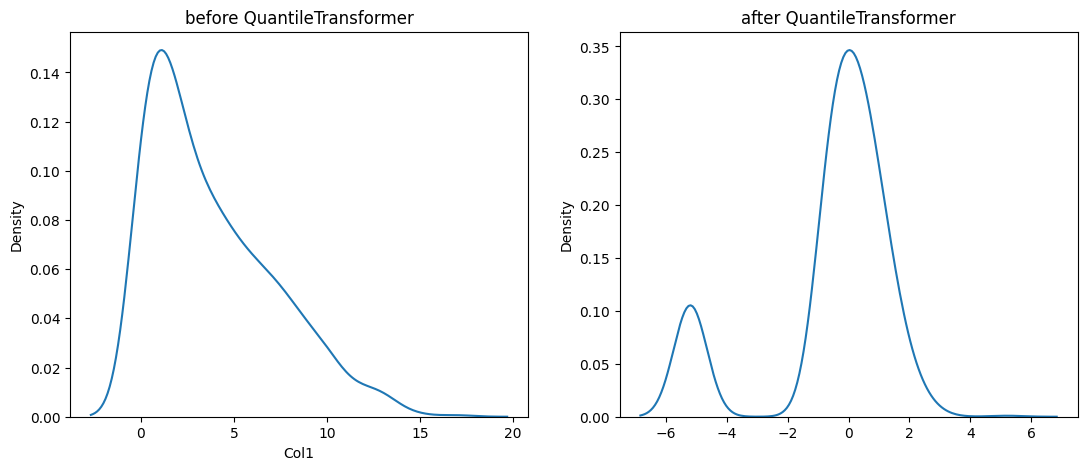

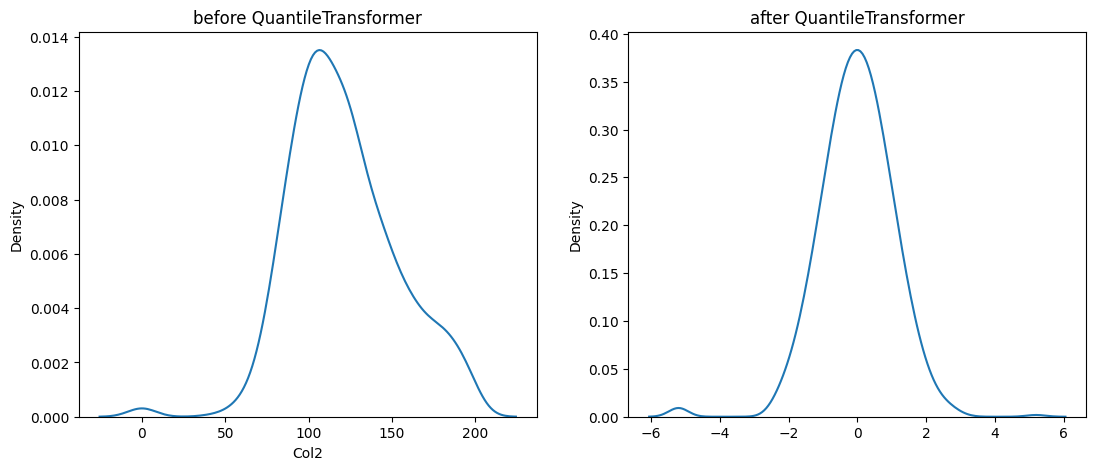

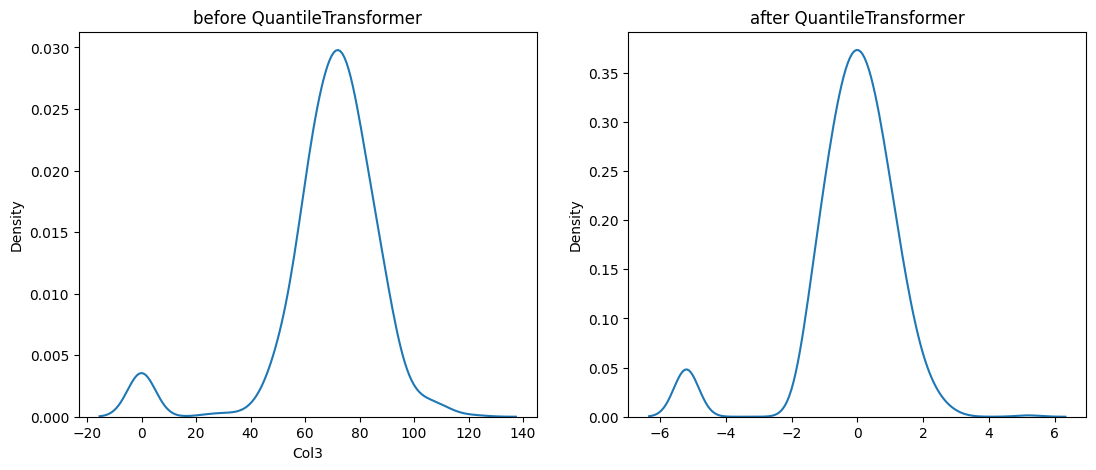

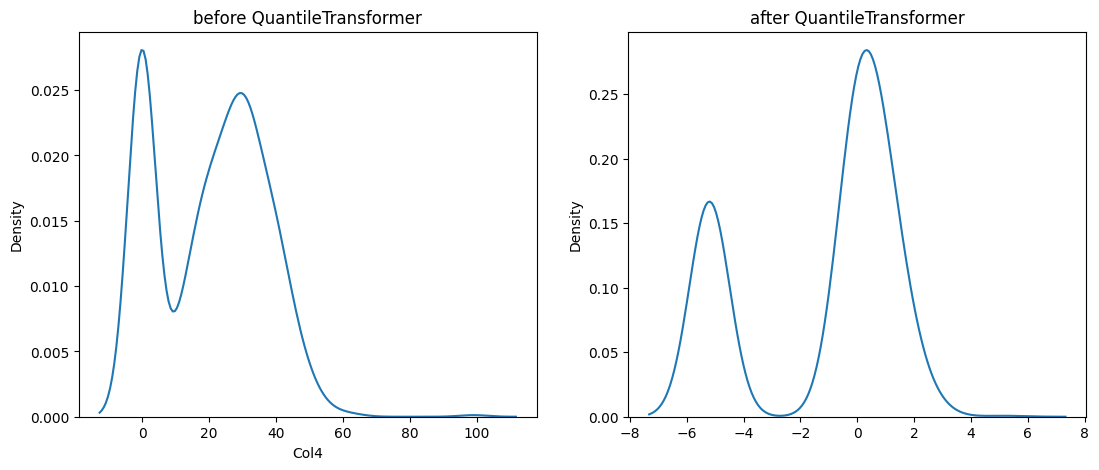

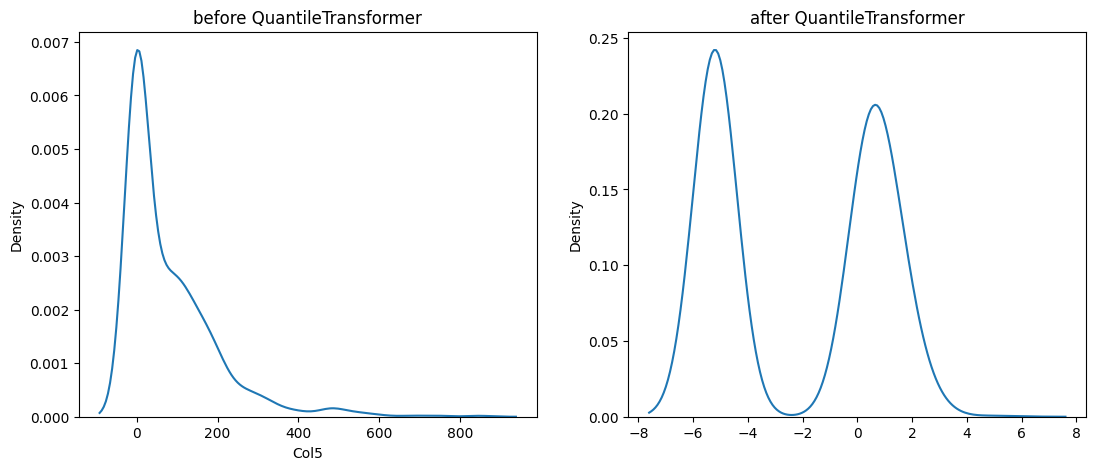

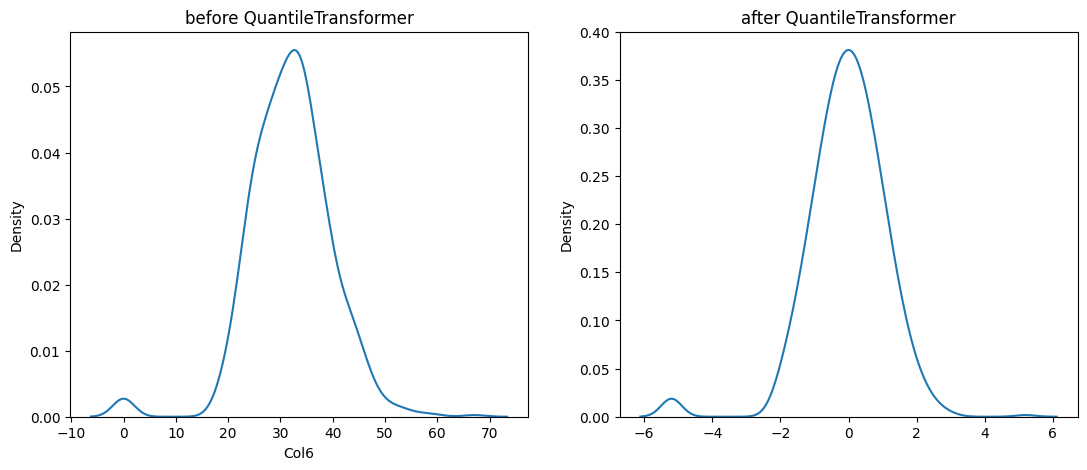

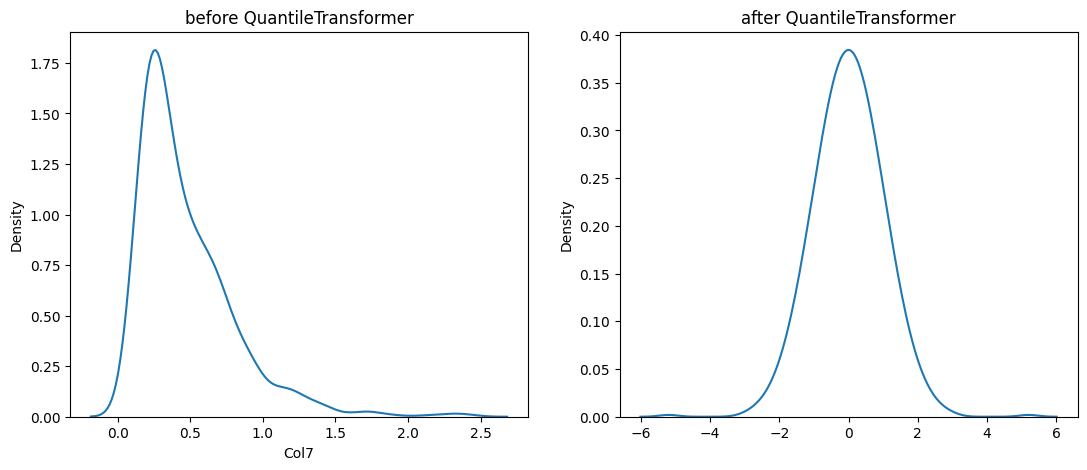

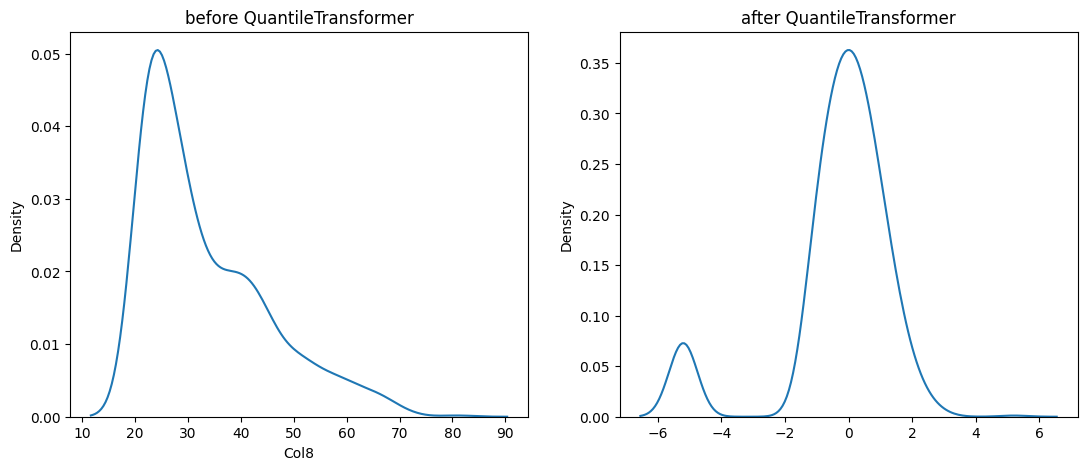

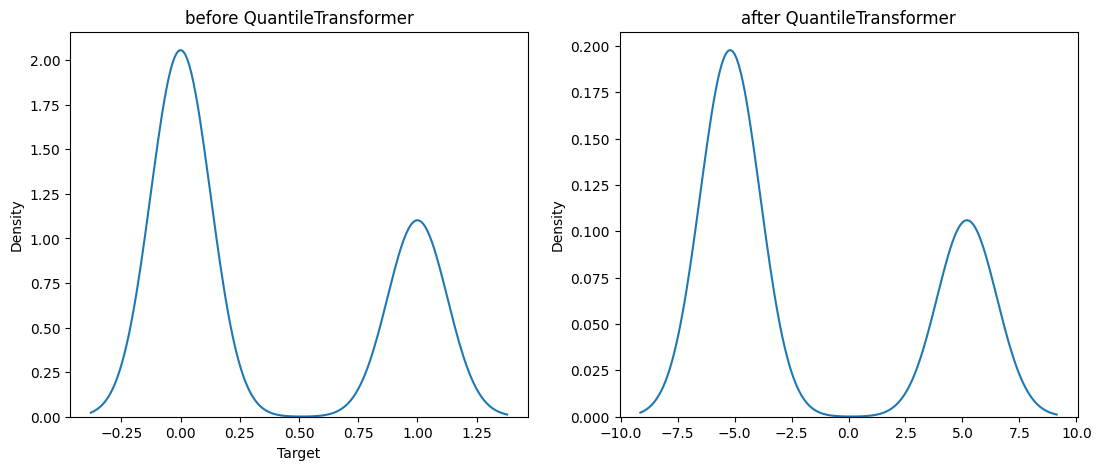

In [79]:
for col in df.columns:
    plots(df, col, QuantileTransformer(output_distribution='normal'))

In [81]:
df_new

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Target
0,0.747718,0.810300,0.516949,0.801825,0.000000,0.591265,0.750978,0.889831,1.0
1,0.232725,0.097784,0.336375,0.644720,0.000000,0.227510,0.475880,0.558670,0.0
2,0.863755,0.956975,0.279009,0.000000,0.000000,0.091917,0.782269,0.585398,1.0
3,0.232725,0.131030,0.336375,0.505867,0.662973,0.298566,0.106258,0.000000,0.0
4,0.000000,0.721643,0.050847,0.801825,0.834420,0.926988,0.997392,0.606258,1.0
...,...,...,...,...,...,...,...,...,...
763,0.940678,0.284224,0.649935,0.978488,0.853977,0.552803,0.110821,0.976532,0.0
764,0.387223,0.561930,0.451108,0.591917,0.000000,0.760756,0.456323,0.411995,0.0
765,0.677966,0.549544,0.516949,0.505867,0.711864,0.213168,0.254889,0.529335,0.0
766,0.232725,0.619948,0.181226,0.000000,0.000000,0.400261,0.473924,0.867014,1.0


c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Col1'>

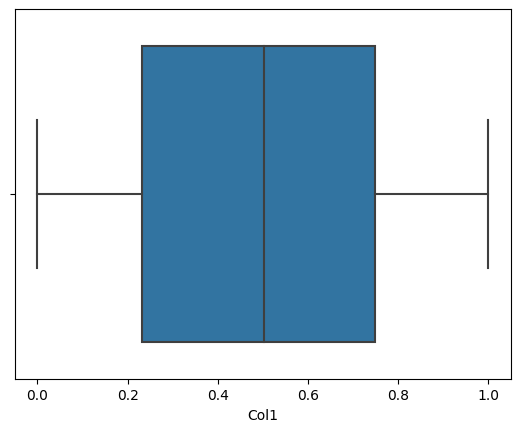

In [82]:
sns.boxplot(df_new["Col1"])

In [107]:
X=df_new.iloc[:,0:8]

In [108]:
y=df_new.iloc[:,8]
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Target, Length: 768, dtype: float64

In [109]:
#Train test split
X_train , X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [88]:
#from sklearn.preprocessing import StandardScaler
#std=StandardScaler()
#X_train=std.fit_transform(X_train)
#X_test= std.transform(X_test)

In [110]:
nb=GaussianNB()

In [111]:
nb.fit(X_train,y_train)

GaussianNB()

In [112]:
y_pred=nb.predict(X_test)

In [113]:
acc=accuracy_score(y_test,y_pred)
acc                     

0.7229437229437229

In [114]:
cr=pd.DataFrame(data=confusion_matrix(y_test.values,y_pred),index=[0,1],columns=[0,1])
cr

,0,1
0,116,35
1,29,51
